In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister, transpile, execute
from qiskit.tools.visualization import plot_histogram
from numpy import pi
from IPython.display import Image

In [2]:
def coined_walk_circuit():
    walker_r = QuantumRegister(4, name="w")
    coin_r = QuantumRegister(2, name="c")
    classic_r = ClassicalRegister(4, name="output")
    qc = QuantumCircuit(walker_r, coin_r,classic_r)
    return qc, walker_r, coin_r, classic_r

In [3]:
def initialize_coined_walk_circuit(qc, walker_r, coin_r, initial_position):
    for i in range(4):
        if initial_position & (1 << i):
            qc.x(walker_r[4 - i - 1])
    return qc

In [4]:
def shift_operator(qc, walker_r, coin_r):
    qc.h(coin_r)
    qc.z(coin_r)
    qc.cz(coin_r[0],coin_r[1])
    qc.h(coin_r)
    for i in range(0,4):
        qc.x(coin_r[0])
        if i%2==0:
            qc.x(coin_r[1])
        qc.ccx(coin_r[0],coin_r[1],walker_r[i])
    return qc

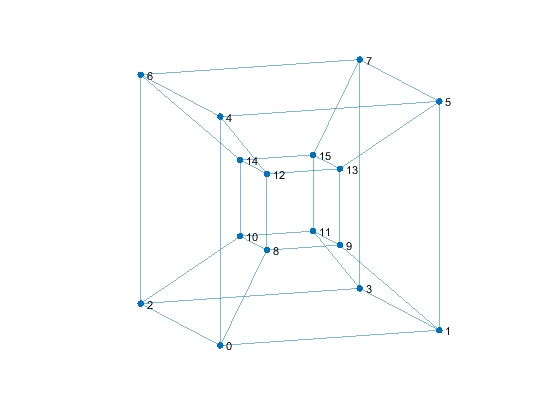

In [13]:
Image("hypercube.png", width=1000, height=1000) 

{'1111': 341, '0110': 2126, '1010': 285, '1001': 980, '0011': 304, '1100': 310, '0000': 331, '0101': 323}


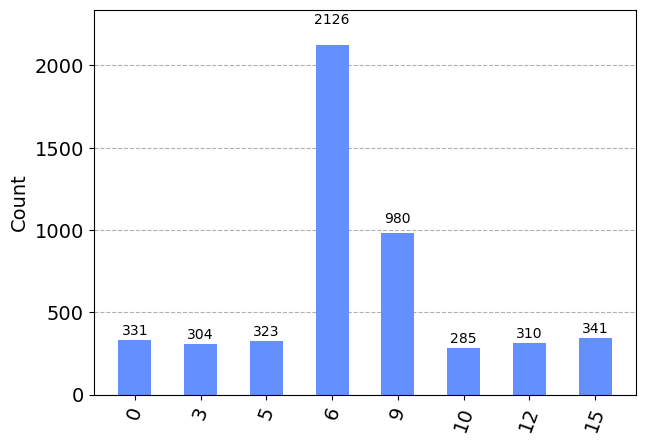

In [16]:
initial_position = 6
n_steps = 100
n_runs = 5000 

qc, walker_r, coin_r, classic_r = coined_walk_circuit()
qc = initialize_coined_walk_circuit(qc, walker_r, coin_r, initial_position)

for i in range(n_steps):
    step_gate = shift_operator(QuantumCircuit(walker_r, coin_r), walker_r, coin_r)
    qc.append(step_gate.to_gate(label=f"Step #{i + 1}"), walker_r[:] + coin_r[:])

qc.measure(walker_r, reversed(classic_r))
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=n_runs).result().get_counts()
print(counts)
counts = {int(k, 2): v for k, v in counts.items()}
plot_histogram(counts) 